In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt




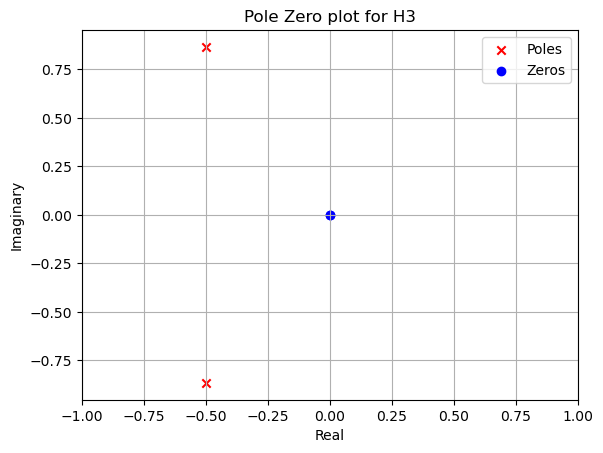

c:\Users\lober\anaconda3\Lib\site-packages\control\timeresp.py:2015: UserWarning: System has direct feedthrough: `D != 0`. The infinite impulse at `t=0` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: `D != 0`. The "


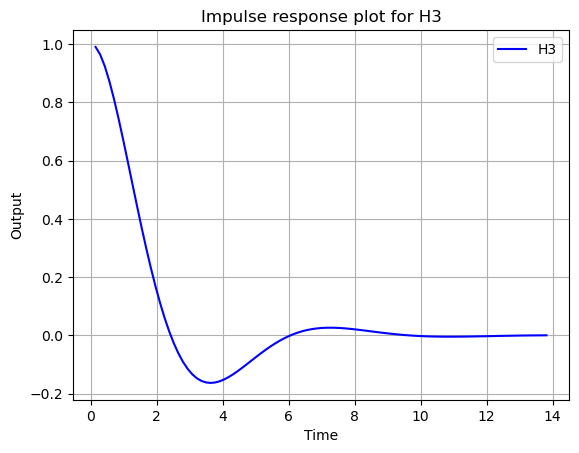

c:\Users\lober\anaconda3\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


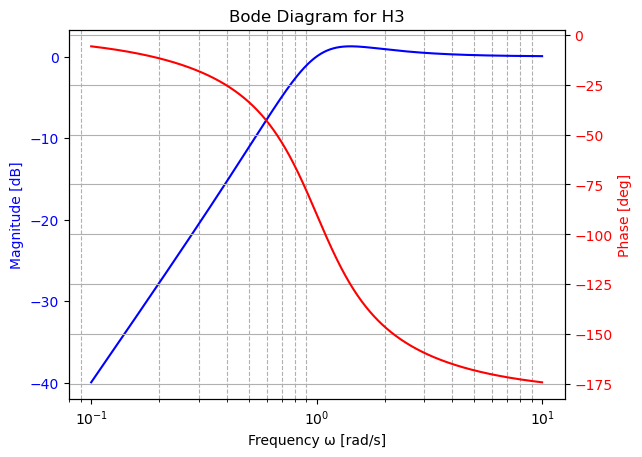

In [ ]:
G = R = C = R2 = R3 = 1

GRC = G/(R*C)
R2R3 = R2/R3

num3 = np.array([-1, 0, 0]) # -s**2
num2 = np.array([-GRC, 0])  # -G/(RC)*s
num1 = np.array([-GRC**2])  # -(G/(RC))**2
den = np.array([1, R2R3*GRC, GRC**2])

H3 = ct.tf(num3, den)
H2 = ct.tf(num2, den)
H1 = ct.tf(num1, den)


def plot_pole_zero(TransferFunction):
    # Obtain imaginary and real parts of poles and zeros
    pol_r = np.real(ct.poles(TransferFunction))
    pol_c = np.imag(ct.poles(TransferFunction))
    zero_r = np.real(ct.zeros(TransferFunction))
    zero_c = np.imag(ct.zeros(TransferFunction))

    # Plot
    plt.scatter(pol_r, pol_c, marker = 'x', color = 'r', label = 'Poles')
    plt.scatter(zero_r, zero_c, marker = 'o', color = 'b', label = 'Zeros')
    plt.xlabel('Real'), plt.ylabel('Imaginary')
    plt.xlim(-1.5, 1)
    plt.xlim(-1, 1)
    plt.grid(True, which='both', axis='both')
    plt.title(f'Pole Zero plot for H{np.size(zero_r)+1}')
    plt.legend()
    plt.show()

plot_pole_zero(H3)

def plot_impulse_respons(TransferFunction):
    # Generate impulse response
    ImpulseResponse = ct.impulse_response(H3)
    
    # Plot 
    plt.plot(ImpulseResponse[0][1:], ImpulseResponse[1][1:], label = f'H{np.size(np.real(ct.zeros(TransferFunction)))+1}', color = 'b')  # remove first element, diverges
    plt.xlabel('Time'), plt.ylabel('Output')
    plt.grid(True, which='both', axis='both')
    plt.title(f'Impulse response plot for H{np.size(np.real(ct.zeros(TransferFunction)))+1}')
    plt.legend()
    plt.show()

plot_impulse_respons(H3)

def plot_bode(TransferFunction):
    # Generate magnitude (x), phase for different frequencys omega
    mag, phase, omega = ct.bode(TransferFunction, plot = False)

    # Create figure
    fig, ax1 = plt.subplots()

    # Plot amplification on left y-axis
    ax1.semilogx(omega, 20*np.log10(mag), 'b', label="Magnitude")   # Converts to dB
    ax1.set_xlabel("Frequency ω [rad/s]")
    ax1.set_ylabel("Magnitude [dB]", color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True, which="minor", ls="--")   # major + minor grid
    ax1.set_xscale("log")

    # Create second y-axis for phase
    ax2 = ax1.twinx()
    ax2.semilogx(omega, phase*180/np.pi, 'r', label="Phase")
    ax2.set_ylabel("Phase [deg]", color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    plt.title(f"Bode Diagram for H{np.size(np.real(ct.zeros(TransferFunction)))+1}")
    plt.grid(True, which="both")
    plt.show() 
        
plot_bode(H3)